# Chapter 2 Deep CNN Architectures

**CNN** - Convolutional Neural Network

**Convolution** - A layer that scans a small subset of the image left to right, top to bottom to detect patterns

* CNN are good for
  * Image classification
  * Object detection
  * Object segmentation
  * Video Processing
  * Natural language processing
  * Speech recognition

* CNN Attributes
  * Weight Sharing
    * **Parameter Efficiency**, different features can be extracted with the same set of weights
    * **Features** are the high-level representations of input data the model generates with its parameters
  * Automatic Feature Extraction
    * Multi stage feature extraction means CNN **automatically** learn features
  * Hierarchical Learning
    * CNN's are good at learning low, mid and high-level features
      * low - basic blocks like edges and lines
      * mid - shapes and objects
      * high-level - actions and scenes
  * Spatial and Temporal

* CNN updates over the years
  * Using better **activation** and **loss functions** like **ReLU** and **vanishing gradient problem**
  * Parameter optimization like **Adam**
  * **Regularization** through dropout and batch normalization

Biggest drivers of CCN improvements have been architectural. 

**Spation exploration-based CNN**s - Use different kernel sizes in order to explore different levels of visual features in input data.

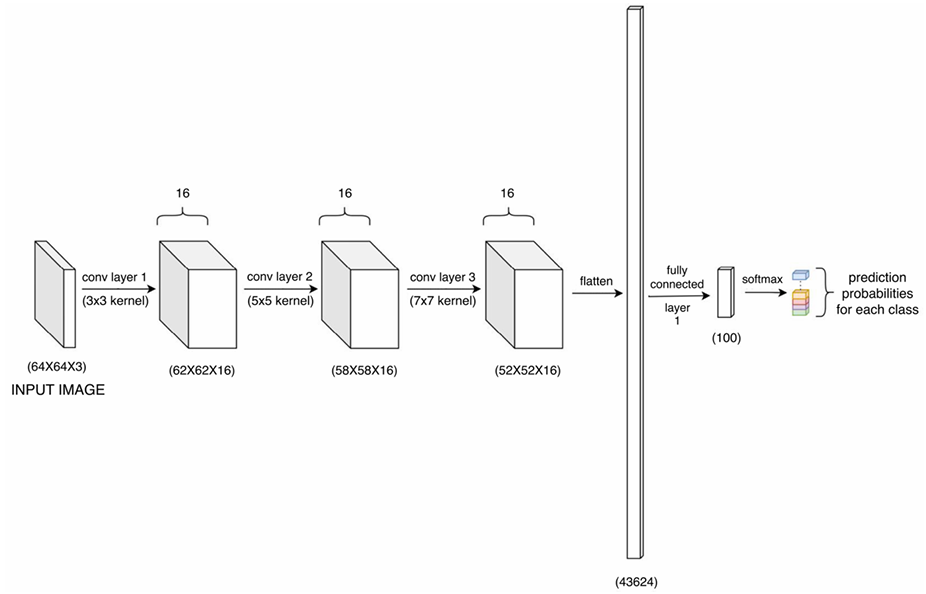

**Depth-based CNN**s - depth of the neural network, or number of layers. This CNN has multiple convolutional layers in order to extract complex visual features.

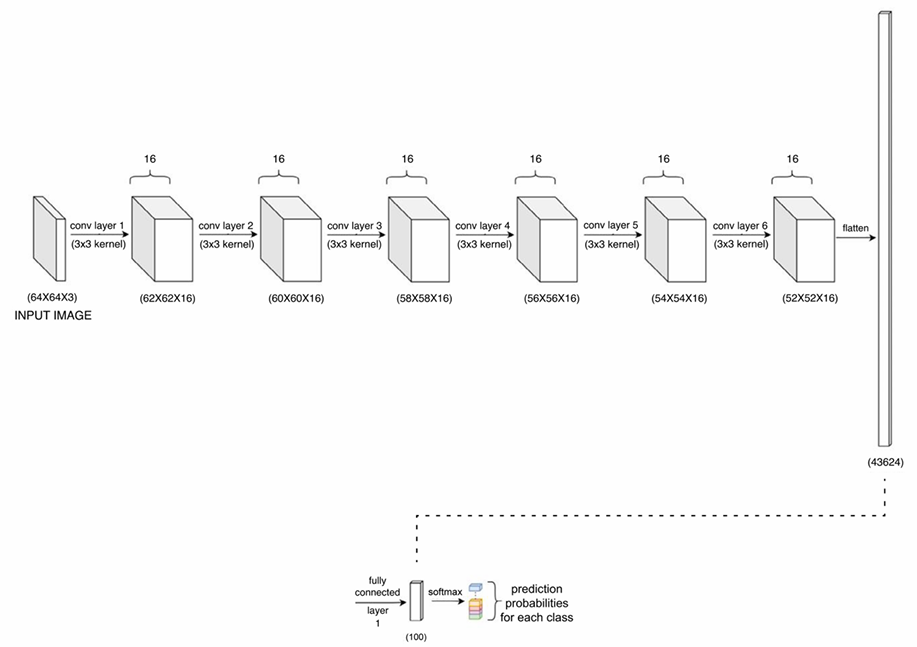

**Width-based CNN**s - number of channels or feature maps in the data or features extracted from the data. Increase the feature maps as you go from input to output.

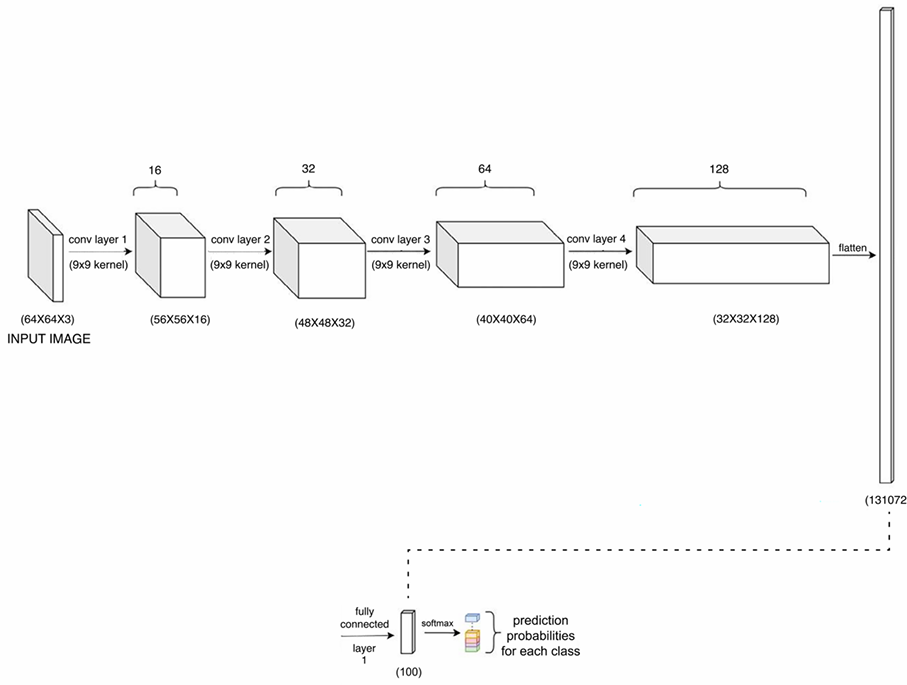

**Multi-path-based CNN**s - This allows for shortcut or skips between non-consecutive layers.

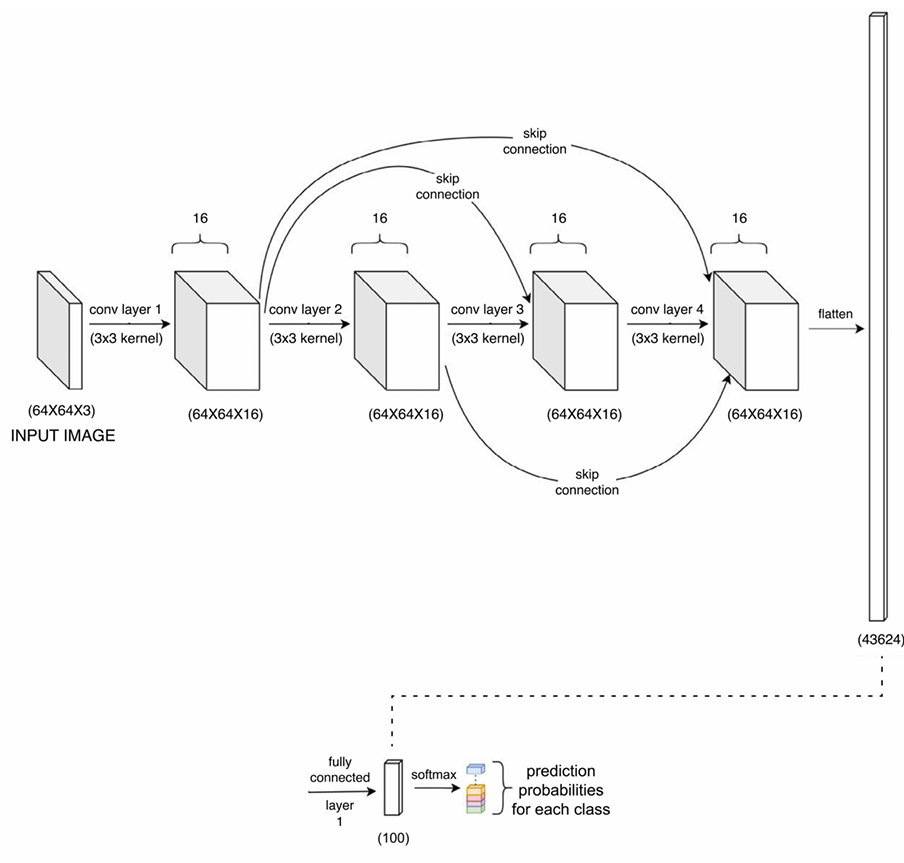

History

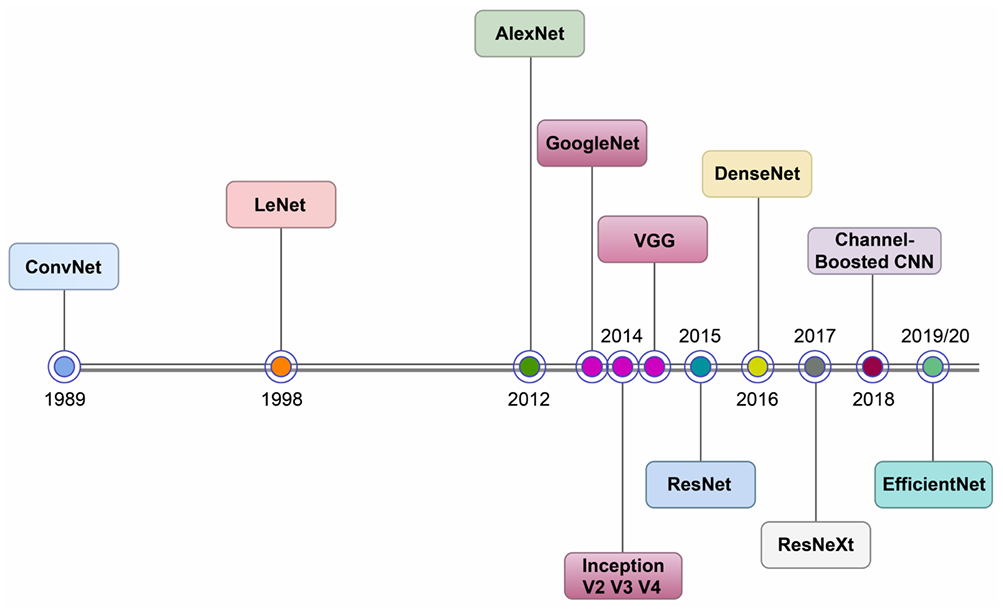

**Max Pooling** was invented for effective subsampling. 


## Using PyTorch to build LeNet

Import dependencies

`torch.use_deterministic_algorithms(True)` helps ensure reproducibility.

By invoking use_deterministic_algorithms, you can replicate the same sequence of computations and produce consistent results, which is crucial for reproducibility and reliability in machine learning experiments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
torch.use_deterministic_algorithms(True) # for reproducibility by way of deterministic algorithms

Define the model architecture

Pg 47

In [3]:
class LeNet(nn.Module):
    def __init__(self): # self is the object of the class
        super(LeNet, self).__init__() # This and prev lines means that the LeNet class inherits from the nn.Module class
        # self means that the variables are part of the class
        self.cn1 = nn.Conv2d(3, 6, 5) # 3 input channels, 6 output channels, 5x5 kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, 5x5 kernel, fully connected layer
        self.fc1 = nn.Linear(16*5*5, 120) # 16*5*5 input features, 120 output features
        self.fc2 = nn.Linear(120, 84) # 120 input features, 84 output features
        self.fc3 = nn.Linear(84, 10) # 84 input features, 10 output features
        # .cn1, .cn2, .fc1, .fc2, .fc3 are the layers of the network
        # cn1 is the first convolutional layer, cn2 is the second convolutional layer, fc1 is the first fully connected layer, fc2 is the second fully connected layer, fc3 is the third fully connected layer
    def forward(self, x): # this line defines the forward pass of the network, x is the input and self is the network
        x = F.relu(self.cn1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.cn2(x))
        x = F.max_pool2d(x, (2, 2))
        x = x.view(-1, self.flattened_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def flattened_features(self, x): # this function calculates the number of features in the input tensor
        # self references the object of the class, x is the input tensor
        # flattened features means that the features are flattened into a 1D tensor
        size = x.size()[1:] # size is the size of the input tensor
        # size = the size of x and the [1:] means that the first dimension is not included because it starts from 0
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet = LeNet() # lenet is an object of the LeNet class
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The `flattened_feastures` method is meant to calc the total number of features in an image representation layer. 

Define the training routine.

In [4]:
def train(net, trainloader, optim, epoch):
    # initialize loss
    loss_total = 0.0
    for i, data in enumerate(trainloader, 0):
        # enumerate is a function that returns the index and the value of the elements in the iterable
        # i is the index, data is the value
        ip, ground_truth = data
        # ip is the input, ground_truth is the target, ground truth means the correct output
        optim.zero_grad()
        # zero_grad initializes the gradients of the parameters to zero
        op = net(ip) # op is the output of the network
        loss = nn.CrossEntropyLoss()(op, ground_truth)
        loss.backward()
        optim.step()
        # Update loss
        loss_total += loss.item() # loss.item() returns the loss as a scalar
        # a scalar is a single number
        if (i+1) % 1000 == 0:
            # print at the interval of 1000 mini-batches
            print('Epoch %d, Mini-batch %5d, Loss: %.3f' % (epoch + 1, i + 1, loss_total / 200))
            loss_total = 0.0


Define the test routine.

In [5]:
def test(net, testloader):
    success = 0
    counter = 0
    with torch.no_grad(): # this line means that the gradients are not calculated
        for data in testloader:
            im, ground_truth = data # im is the input, ground_truth is the target
            op = net(im) # op is the output of the network
            _, pred = torch.max(op.data, 1) # pred is the predicted output
            # _, pred means that the first output is not stored
            # torch.max returns the maximum value and the index of the maximum value
            # op.data is the output of the network, 1 is the dimension along which the maximum value is calculated
            counter += ground_truth.size(0) # ground_truth.size(0) returns the number of elements in the tensor
            success += (pred == ground_truth).sum().item() # (pred == ground_truth) returns a tensor of booleans, .sum() returns the number of True values, .item() returns the number of True values as a scalar
        print('LeNet accuracy on 10000 images from test dataset: %d %%' % (100 * success / counter))

Lets load the CIFAR-10 dataset.

Download and extra to data folder: https://www.cs.toronto.edu/~kriz/cifar.html

Pg 50

In [6]:
train_transform = transforms.Compose( # Compose is a function that composes several transforms together
    # a transform is a function that takes an image and returns a transformed image
    # transformers is a module that contains functions for image transformations
    [transforms.RandomHorizontalFlip(), # RandomHorizontalFlip is a function that flips the image horizontally
     transforms.RandomRotation(32, 4), # RandomRotation is a function that rotates the image by a random angle
     transforms.ToTensor(), # ToTensor is a function that converts the image to a tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Normalize is a function that normalizes the image
     # normalize means that the image is scaled to have a mean of 0.5 and a standard deviation of 0.5
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
# CIFAR10 is a dataset of 60000 32x32 color images in 10 classes, with 6000 images per class
# root is the directory where the dataset is stored
# download is a boolean that specifies whether to download the dataset, the file is downloaded if it does not exist
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)
test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# This order matters for this dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Lets validate how the data looks

In [12]:
# create a function that displays an image
def imageshow(image):
    # unnormalize the image
    image = image / 2 + 0.5
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage, (1, 2, 0)))
    plt.show()

# sample images from the training set
dataiter = iter(trainloader) # iter is a function that returns an iterator object
images, labels = next(dataiter) # next is a function that returns the next item in the iterator
# display images in a grid
num_images = 4
imageshow(torchvision.utils.make_grid(images[:num_images]))
# print labels
print(' '+' || '.join(classes[labels[j]] for j in range(num_images)))

ValueError: Image.Resampling.BOX (4) cannot be used. Use Image.Resampling.NEAREST (0), Image.Resampling.BILINEAR (2) or Image.Resampling.BICUBIC (3)